# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
from api_keys import g_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



601


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1



print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : jamestown
Processing Record 2 of Set 1 : ambon
City not found. Skipping...
Processing Record 3 of Set 1 : georgetown
Processing Record 4 of Set 1 : mariana
City not found. Skipping...
Processing Record 5 of Set 1 : busselton
City not found. Skipping...
Processing Record 6 of Set 1 : merauke
Processing Record 7 of Set 1 : mount gambier
City not found. Skipping...
Processing Record 8 of Set 1 : esperance
Processing Record 9 of Set 1 : bredasdorp
Processing Record 10 of Set 1 : new norfolk
Processing Record 11 of Set 1 : enshi
Processing Record 12 of Set 1 : barela
Processing Record 13 of Set 1 : severo-kurilsk
Processing Record 14 of Set 1 : atuona
Processing Record 15 of Set 1 : geraldton
Processing Record 16 of Set 1 : thompson
City not found. Skipping...
Processing Record 17 of Set 1 : quatre cocos
City not found. Skipping...
Processing Record 18 of Set 1 : olafsvik
Processing Record 19 of Set 1 : u

Processing Record 31 of Set 4 : vila franca do campo
Processing Record 32 of Set 4 : saldanha
Processing Record 33 of Set 4 : carahue
Processing Record 34 of Set 4 : ponta do sol
City not found. Skipping...
Processing Record 35 of Set 4 : mandera
Processing Record 36 of Set 4 : de-kastri
Processing Record 37 of Set 4 : alenquer
Processing Record 38 of Set 4 : srednekolymsk
Processing Record 39 of Set 4 : rafai
City not found. Skipping...
Processing Record 40 of Set 4 : codrington
Processing Record 41 of Set 4 : kudahuvadhoo
Processing Record 42 of Set 4 : faya
Processing Record 43 of Set 4 : cherskiy
Processing Record 44 of Set 4 : hamilton
Processing Record 45 of Set 4 : tiksi
Processing Record 46 of Set 4 : hami
Processing Record 47 of Set 4 : conde
Processing Record 48 of Set 4 : coquimbo
Processing Record 49 of Set 4 : buin
Processing Record 50 of Set 4 : jaen
Processing Record 0 of Set 5 : grand gaube
Processing Record 1 of Set 5 : rawson
City not found. Skipping...
Processing Rec

City not found. Skipping...
Processing Record 13 of Set 8 : kavaratti
Processing Record 14 of Set 8 : makat
Processing Record 15 of Set 8 : broken hill
City not found. Skipping...
Processing Record 16 of Set 8 : sidi ali
Processing Record 17 of Set 8 : murray
City not found. Skipping...
Processing Record 18 of Set 8 : henties bay
Processing Record 19 of Set 8 : ishigaki
Processing Record 20 of Set 8 : mfou
Processing Record 21 of Set 8 : alaca
Processing Record 22 of Set 8 : port macquarie
Processing Record 23 of Set 8 : perth
Processing Record 24 of Set 8 : oktyabrskoye
Processing Record 25 of Set 8 : adrar
Processing Record 26 of Set 8 : tacoronte
Processing Record 27 of Set 8 : raisen
Processing Record 28 of Set 8 : clyde river
Processing Record 29 of Set 8 : papara
Processing Record 30 of Set 8 : ulladulla
Processing Record 31 of Set 8 : vila velha
City not found. Skipping...
Processing Record 32 of Set 8 : kaili
Processing Record 33 of Set 8 : iqaluit
Processing Record 34 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create a datamframe 
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Longitude" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Longitude,Max Temp,Wind Speed
0,Jamestown,90,US,1619316103,50,42.0970,-79.2353,52.00,9.22
1,Ambon City,40,ID,1619315855,62,-3.6954,128.1814,89.60,5.75
2,George Town,20,MY,1619316130,89,5.4112,100.3354,84.20,4.61
3,Mariana,0,BR,1619316130,92,-20.3778,-43.4161,62.58,1.83
4,Busselton,1,AU,1619316130,69,-33.6500,115.3333,69.22,1.12
...,...,...,...,...,...,...,...,...,...
538,Lorengau,13,PG,1619316325,71,-2.0226,147.2712,83.57,5.32
539,Puerto del Rosario,0,ES,1619316185,64,28.5004,-13.8627,68.00,5.75
540,Karachi,0,PK,1619316072,57,24.9056,67.0822,78.80,7.00
541,Nuuk,75,GL,1619316326,49,64.1835,-51.7216,46.40,12.66


In [14]:
weather_df.to_csv(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\cities.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

From the above table, no cities showed a humidity greater than 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

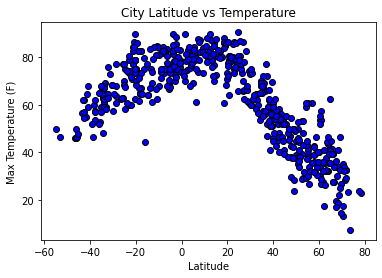

In [29]:
#Create Latitude v Temperature Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Max Temperature (F)")

#Title
plt.title("City Latitude vs Temperature")

#Save the plotted figure as png 
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

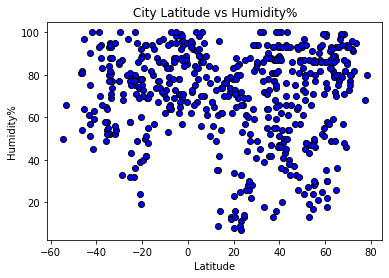

In [31]:
#Create Latitude v Humidity Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Humidity%")

#Title
plt.title("City Latitude vs Humidity%")

#Save the plotted figure as png 
plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Humidity.png")

## Latitude vs. Cloudiness Plot

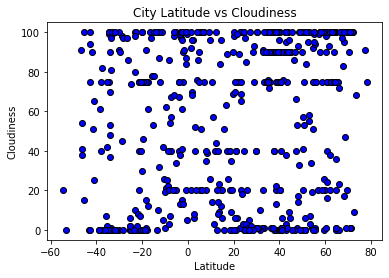

In [33]:
#Create Latitude v Cloudiness Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Cloudiness")

#Title
plt.title("City Latitude vs Cloudiness")


plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Cloudiness.png")

## Latitude vs. Wind Speed Plot

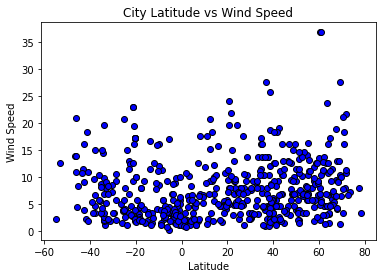

In [34]:
#Create Latitude v Cloudiness Scatter Plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"],edgecolor = "black",facecolor = "blue" )

#x axis 
plt.xlabel("Latitude")

#Y axis 
plt.ylabel("Wind Speed")

#Title
plt.title("City Latitude vs Wind Speed")


plt.savefig(r"C:\Users\kndrs\Python-Api-Challenge\Weather Py\Latitude v Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression